**В нашем распоряжении исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.**


**Цель исследования:** 
- Найти наиболее перспективные жанры игр в зависимости от региона;
- Найти наиболее перспективные платформы  в зависимости от региона;
- Определить зависимость положительных отзывов на количество проданных копий игры;
- Проверить гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.


**Навигация:**

- [1. Обзор данных](#Обзор_данных)
- [2. Предобработка данных:](#Предобработка_данных)
  - [приведение данных к нижнему регистру](#регистр)
  - [обработка пропусков](#пропуски)
  - [приведение типов данных](#тип)
  - [вывод](#вывод1)
- [3. Исследовательский анализ данных:](#анализ)
  - [количество игр по годам](#сколько)
  - [продажи по платформам](#продажи)
  - [жизненный цикл платформ](#срок)
  - [прибыльные платформы](#прибыльные)
  - [график «ящик с усами» по продажам](#ящик)
  - [влияние отзывов пользователей и критиков](#отзыв)
- [4. Портрет пользователя](#портрет)
  - [лидеры продаж по регионам](#лидер)
  - [популярные жанры](#жанр)
  - [рейтинг ESRB](#ESRB)
- [5. Проверка гипотез](#гипотеза)
  - [рейтинги платформ Xbox One и PC](#PC)
  - [рейтинги жанров Action и Sports](#Sports)
- [6. Общий вывод](#общий) 



**Описание данных:**
- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<a name="Обзор_данных"></a>
## 1. Обзор данных


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings


warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)


In [2]:
try:
    data = pd.read_csv('games.csv', sep=',')
except:
    data = pd.read_csv('/datasets/games.csv', sep=',')

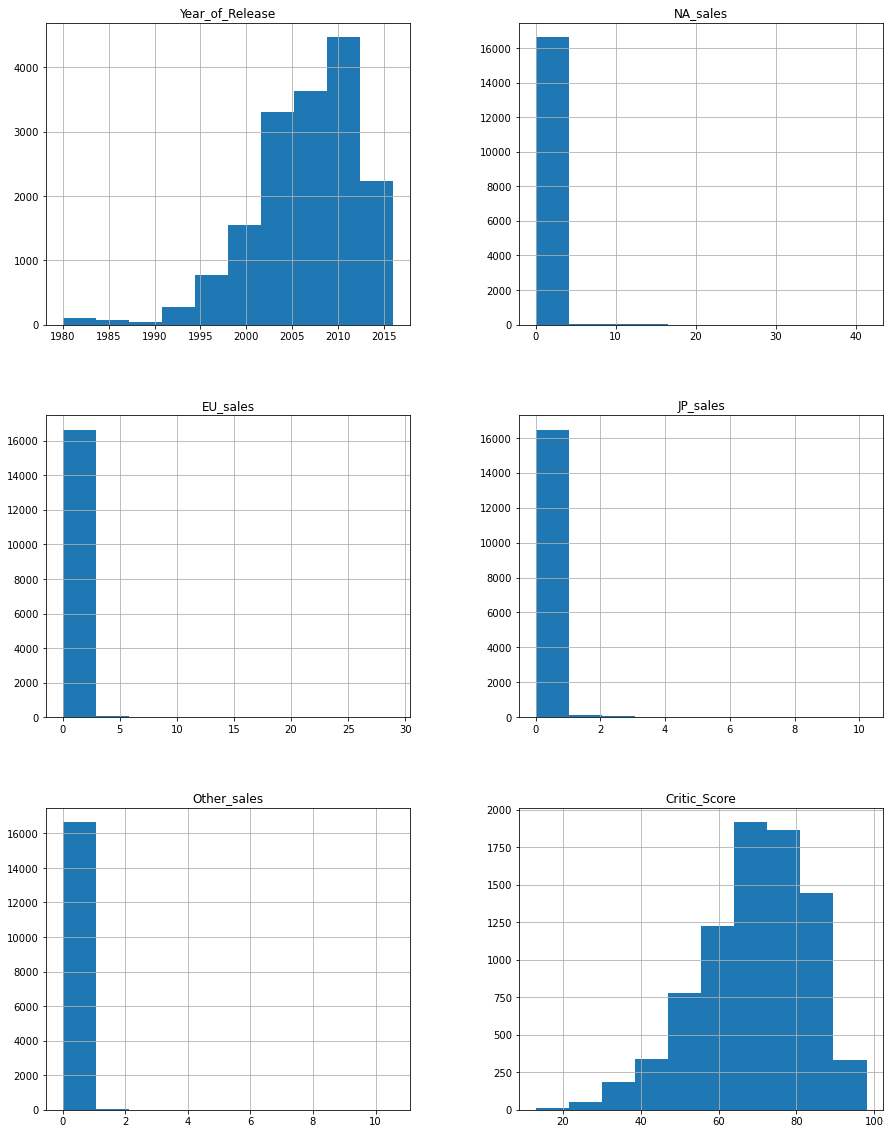

In [3]:
data.hist(figsize=(15, 20));

In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a name="Предобработка_данных"></a>
## 2. Предобработка данных 


**приведем данные к нижнему регистру**
<a name="регистр"></a>

In [6]:
# приведем название столбцов к нижнему регистру
data.columns = data.columns.str.lower()

#приведем данные в столбцах к нижнему регистру
for index in data[['name', 'platform', 'genre']]:
    data[index] = data[index].str.lower()

**обработаем пропуски**
<a name="пропуски"></a>

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим строки с пропущенными значениями в колонках: 'Name', 'Genre', 'Year_of_Release', ввиду их малочисленности - на исследовании не отразится

In [8]:
data = data.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

В колонке 'User_Score' много ячеек заполненных 'tbd' - 'to be determined', заменим значения на 'Nan'

In [9]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

**изменим типы данных**
<a name="тип"></a>

Сменим тип данных в ячеках 'user_score' и 'critic_score'

In [10]:
data['user_score'] = data['user_score'].astype('float')

Сменим тип данных в ячеке 'critic_score'

In [11]:
data.loc[~data['critic_score'].isna(), 'critic_score'] =data.loc[
    ~data['critic_score'].isna(), 'critic_score'].astype('int')

Добавим новый столбец с суммарными продажами во всех регионах

In [12]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1).round(2)

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

In [14]:
print(data.loc[data['critic_score'].isna()].isna().sum())

data.loc[data['critic_score'].isna()].sort_values(by='total_sales', ascending = False).head(20)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         7892
rating             6595
total_sales           0
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,pokemon gold/pokemon silver,gb,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,super mario world,snes,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,pokemon diamond/pokemon pearl,ds,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,super mario land,gb,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,super mario bros. 3,nes,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


In [15]:
data.loc[data['critic_score'].isna()]['year_of_release'].value_counts().head(20)

2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
Name: year_of_release, dtype: int64

посмотрим есть ли явные дубликаты

In [16]:
data.duplicated().sum()

0

<a name="вывод1"></a>
**Вывод:**
- привели данные к нижнему регисту;
- удалили пропуски;
- привели данные к необходимому нам формату;
- добавим новый столбец с суммарными продажами во всех регионах;
- проверили дубликаты.

Можем отметить, что в столбцах 'critic_score', 'user_score', 'rating' много пропусков, в большинстве случаев есть взаимосвязь, если данные не заполнены в одной ячейке - то в остальных также пусто. Можем предположить несколько причин отсуствия данных:
- Не достаточное кол-во оценок для составления рейтинга;
- Новые игры, которым ещё не успели присвоить рейтинг;
- Рейтинг ESRB имеет юридическую силу только в Северной Америке, если игра нацелена на другой регион - необходимости в его получении нет.

<a name="анализ"></a>
### 3. Исследовательский анализ данных ###

**Посмотрим сколько игр выпускалось в разные годы**
<a name="сколько"></a>

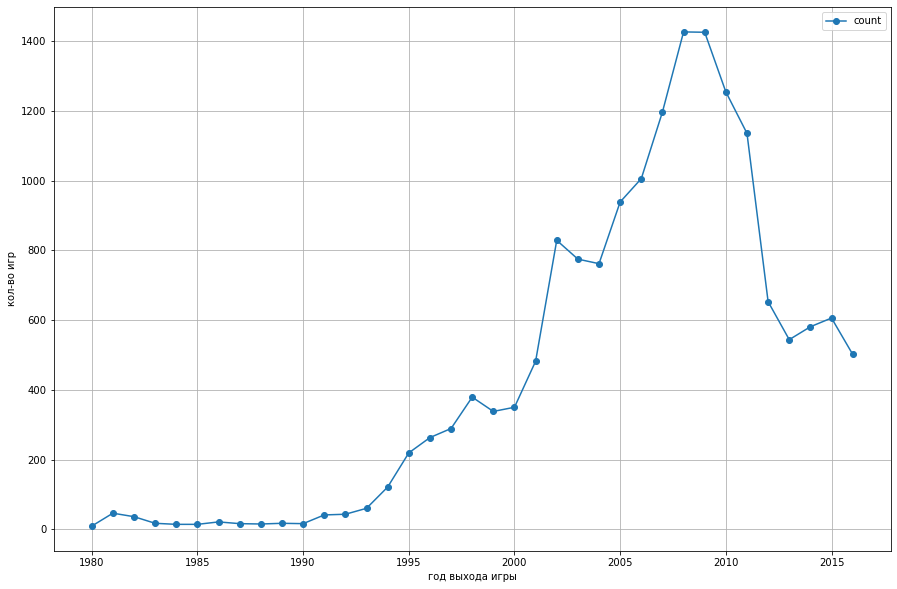

In [17]:
years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

years.columns = ['count']

years.plot(grid=True, y='count', style='o-', figsize=(15, 10))
plt.xlabel("год выхода игры")
plt.ylabel("кол-во игр");

In [18]:
# Посмотрим срез до 20007 г. включительно
w = data.query('year_of_release >= 2001 and year_of_release <= 2007').pivot_table(
    index='year_of_release', values='critic_score', aggfunc=['median','mean'])

w1 = data.query('year_of_release >= 2001 and year_of_release <= 2007').pivot_table(
    index='year_of_release', values='user_score', aggfunc=['median','mean'])

w2 = data.query('year_of_release >= 2001 and year_of_release <= 2007').pivot_table(
    index='year_of_release', values='total_sales', aggfunc=['median','mean', 'count'])
w3 = w.merge(w1, left_index=True, right_index=True, how='outer').merge(w2, left_index=True, right_index=True, how='outer')

# Посмотрим срез после 20007 г. 
q  = data.query('year_of_release > 2007').pivot_table(
    index='year_of_release', values='critic_score', aggfunc=['median','mean'])

q1 = data.query('year_of_release > 2007').pivot_table(
    index='year_of_release', values='user_score', aggfunc=['median','mean'])

q2 = data.query('year_of_release > 2007').pivot_table(
    index='year_of_release', values='total_sales', aggfunc=['median','mean', 'count'])

q3 = q.merge(q1, left_index=True, right_index=True, how='outer').merge(q2, left_index=True, right_index=True, how='outer')


w3.columns = ['Оценка критиков мед',
              'Оценка критиков сред',
              'пользовательская оцена мед',
              'пользовательская оцена сред',
              'общие продажи мед.', 
              'общие продажи сред.', 
              'кол-во проданных игр']
q3.columns = ['Оценка критиков мед',
              'Оценка критиков сред',
              'пользовательская оцена мед',
              'пользовательская оцена сред',
              'общие продажи мед.', 
              'общие продажи сред.', 
              'кол-во проданных игр']

In [19]:
w3

,Оценка критиков мед,Оценка критиков сред,пользовательская оцена мед,пользовательская оцена сред,общие продажи мед.,общие продажи сред.,кол-во проданных игр
year_of_release,,,,,,,
2001.0,73.0,71.414110,8.0,7.594942,0.25,0.687676,482
2002.0,71.0,69.046252,7.9,7.585129,0.17,0.476441,829
2003.0,71.0,70.181197,8.2,7.859884,0.19,0.461342,775
2004.0,70.0,69.393939,8.1,7.750511,0.21,0.549449,762
2005.0,70.0,68.819847,7.8,7.509605,0.17,0.487561,939
2006.0,69.0,67.338710,7.5,7.247283,0.11,0.514622,1006
2007.0,68.0,66.180636,7.2,6.895707,0.15,0.505221,1197


In [20]:
q3

,Оценка критиков мед,Оценка критиков сред,пользовательская оцена мед,пользовательская оцена сред,общие продажи мед.,общие продажи сред.,кол-во проданных игр
year_of_release,,,,,,,
2008.0,68.0,65.904895,7.3,6.950983,0.16,0.470568,1427
2009.0,69.0,67.554531,7.3,6.990717,0.15,0.462006,1426
2010.0,70.0,67.482000,7.2,6.875375,0.14,0.470223,1255
2011.0,70.0,68.692000,6.9,6.623553,0.13,0.446813,1136
2012.0,75.0,72.984424,7.1,6.817404,0.17,0.544931,653
2013.0,75.0,71.278388,6.8,6.470724,0.19,0.664044,544
2014.0,73.0,71.065134,7.0,6.580243,0.16,0.570620,581
2015.0,74.0,72.871111,7.1,6.665993,0.09,0.442211,606
2016.0,74.5,73.155172,7.0,6.629771,0.06,0.258845,502


На графике видим, что начиная с 1990 г. кол-во выпускаемых игр уверенно растет от года к году. Разворотной точкой стал 2008 г. 

К наиболее вероятные причинам начала резкого спада можем отнести:
 - Кризис 2008 года;
 - Выход App Store 2008 год, Android Market 20008 год и  хранилища для Windows Phone 2010 год;
 - Появление free to play игр для мобильных платформ со встроенными микротранзакциями.
 
На текущий момент лучшим решением выглядит использовать данные начиная не позднее 2012 г. включительно, т.к. этот год можем считать окончанием коррекции на рынке.

<a name="продажи"></a>
**Посмотрим, как менялись продажи по платформам.**


Посмотрим общее кол-во продаж по платформам

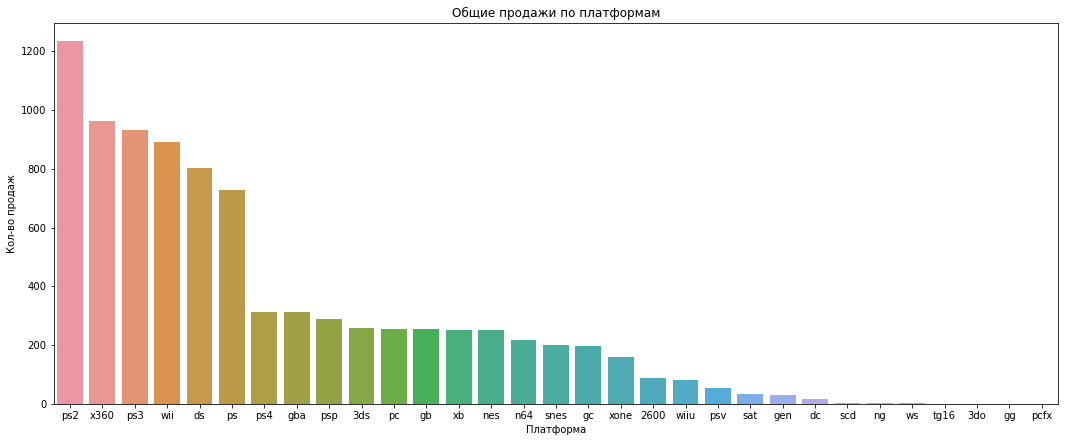

In [21]:
platform_total_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(18,7))
sns.barplot(y = 'total_sales', x=platform_total_sales.index ,data = platform_total_sales)

plt.title("Общие продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Кол-во продаж");

In [22]:
data['platform'].unique(),index[0:10]

(array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
        'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
        'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
        '3do', 'gg', 'pcfx'], dtype=object),
 'genre')

посмотрим распределение продаж по годам

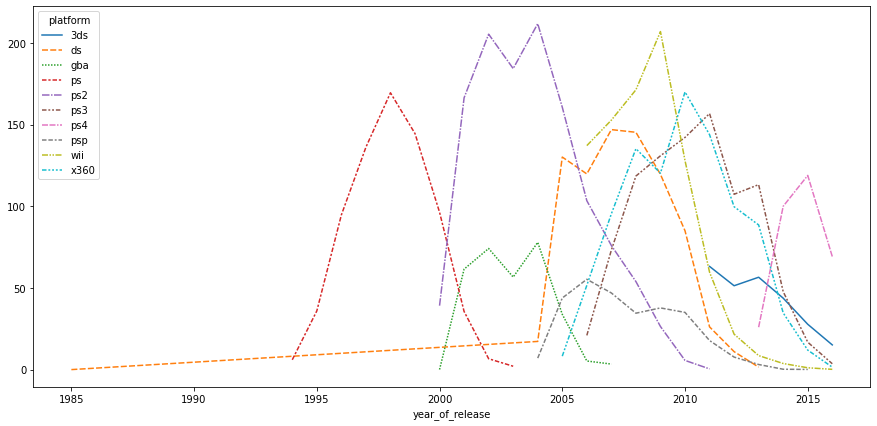

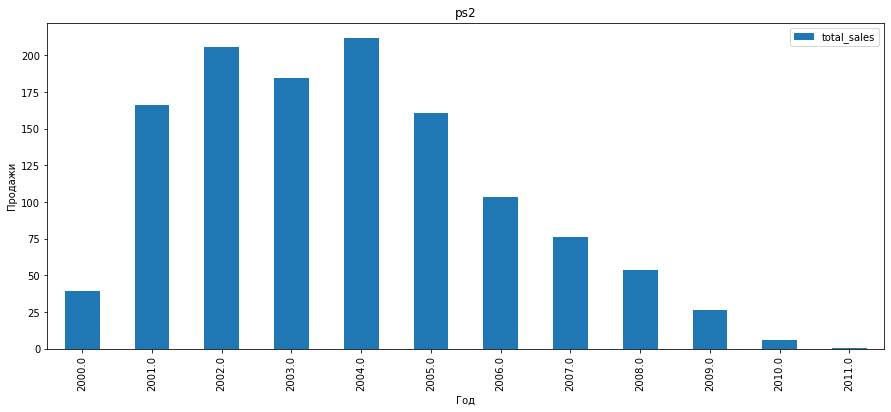

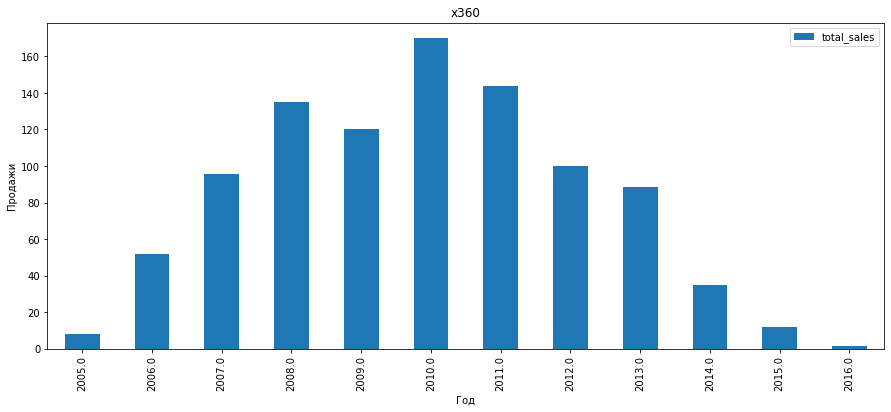

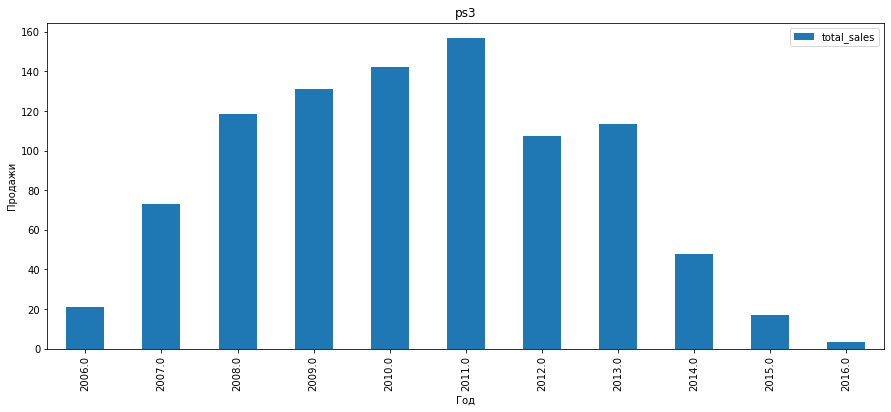

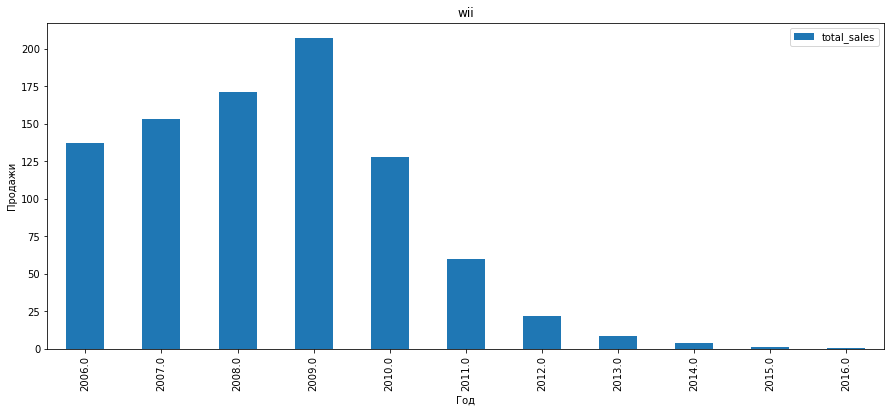

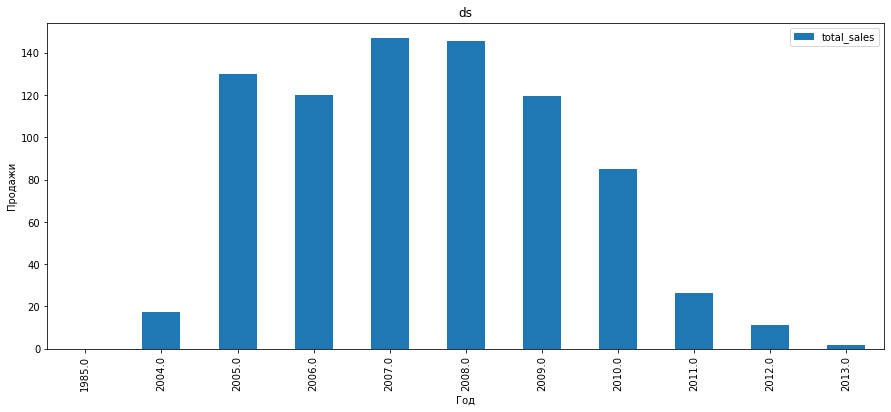

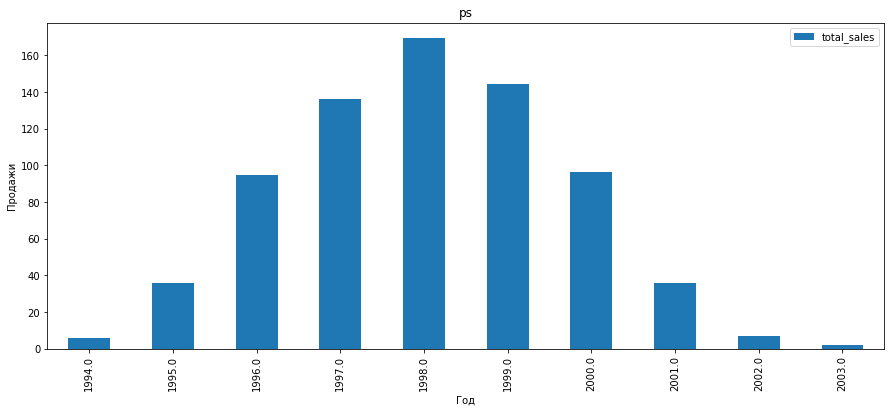

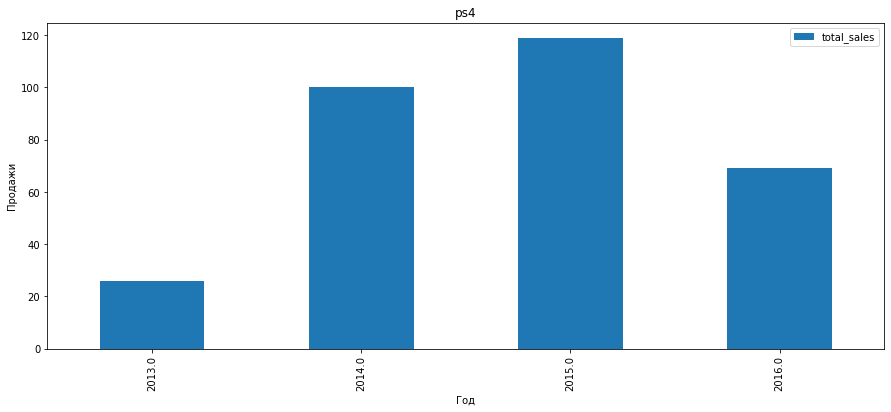

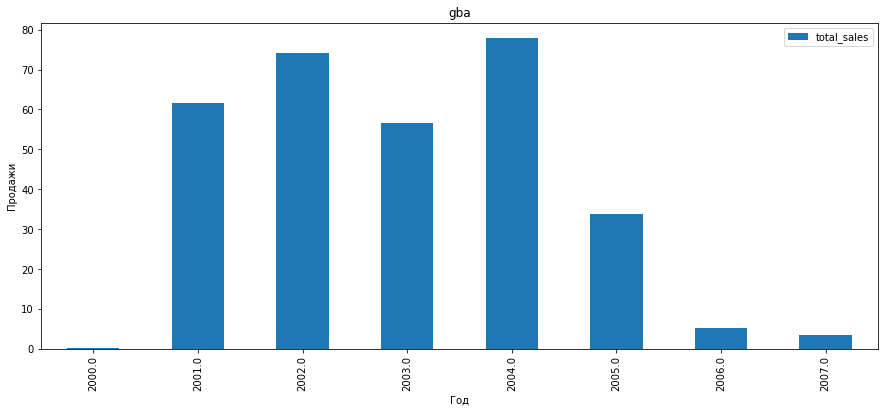

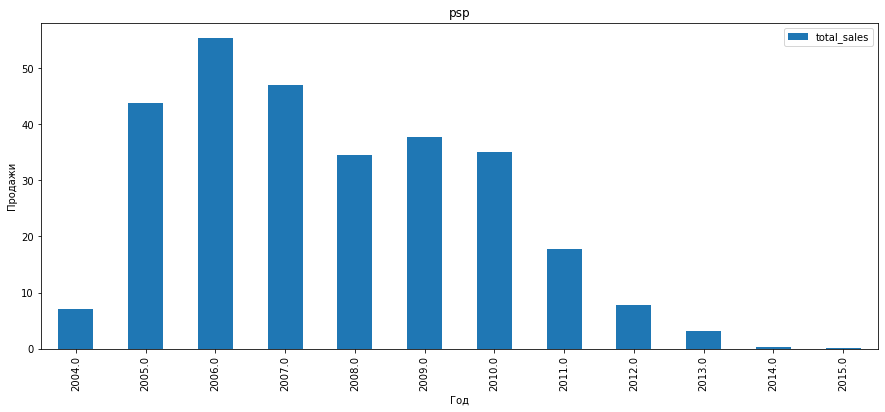

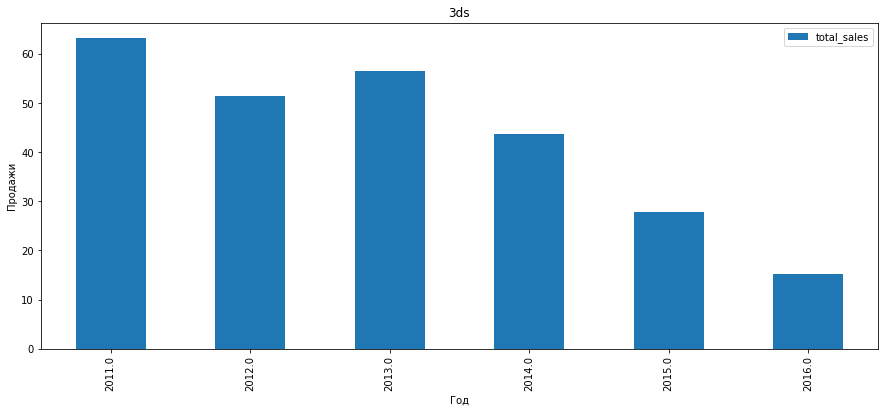

In [23]:
# сделаем срез по top10 платформам
top_10_platform = platform_total_sales[:10].index.unique()

platform_total_sales_top_10 = data.query('platform in @top_10_platform').\
    pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum' )

#Построим общий и отдельный график по каждой платформе 
plt.figure(figsize=(15,7))
sns.lineplot(data=platform_total_sales_top_10);

for index in top_10_platform:
    df = data[data['platform'] == index].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(15,6))
    plt.title(index)
    plt.xlabel('Год')
    plt.ylabel("Продажи");

<a name="срок"></a>
**посмотрим за какой срок появляются новые и исчезают старые платформы?**



In [24]:
# отсортируем платформы из top10 без продаж в 2016 году
not_relevant_platforms = platform_total_sales_top_10.T
not_relevant_platforms = not_relevant_platforms[not_relevant_platforms[2016].isna()].count(axis=1).mean()
not_relevant_platforms

10.6

**Вывод:**
- Средняя продолжительность жизни платформы составляет 10.6 лет;
- Абсолютным лидером, последних лет является ps4

<a name="срок"></a>
***Найдем потенциально прибыльные платформы.***

Посмотрим общие продажи за последние года

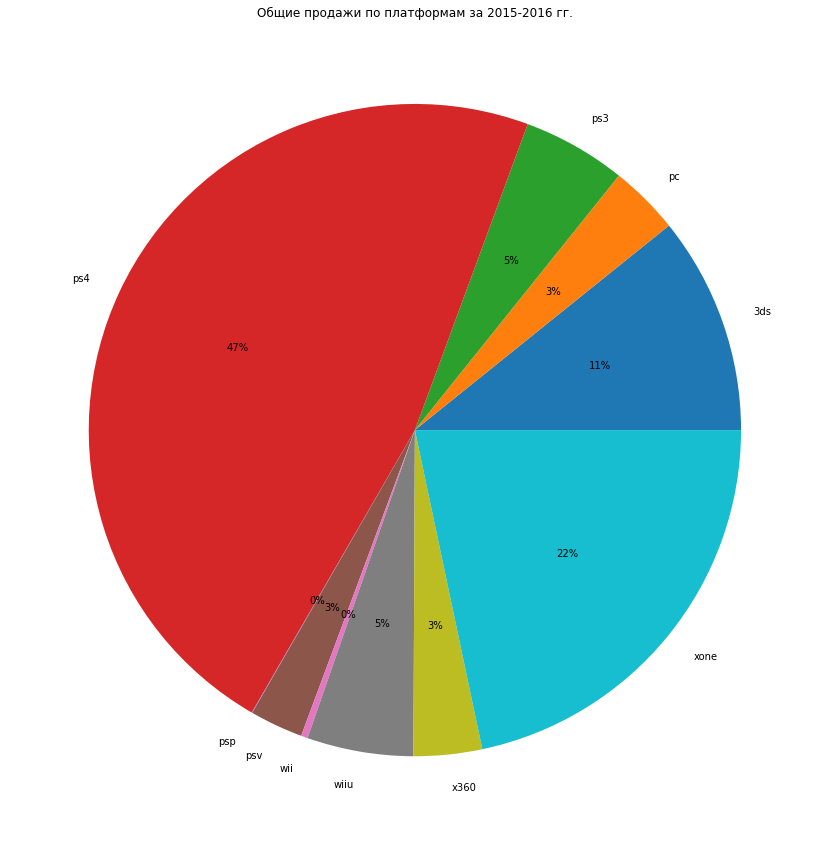

In [25]:
df = data[data['year_of_release'] >= 2015]

top_platform = df.pivot_table(
    columns='platform', values ='total_sales', aggfunc='sum').dropna().T.plot(
    kind='pie', y = 'total_sales', legend = False, autopct= '%1.0f%%', figsize=(15, 15))

plt.title("Общие продажи по платформам за 2015-2016 гг.")
plt.ylabel("");

посмотрим срок службы платформы

In [26]:
q = df.pivot_table(columns='platform', values ='total_sales', aggfunc='sum').dropna()

q = q.columns.unique()

q2 = data.query('platform in @q').\
    pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum' )

q3 = q2[~q2[2016].isna()].count(axis=1)

q3

platform
3ds      6
pc      26
ps3     11
ps4      4
psv      6
wii     11
wiiu     5
x360    12
xone     4
dtype: int64

Наиболее перспективными платформами являются PS4 и XOne, с долей рынка ~70%, плюсом является, что обе платформы относительно молодые - обоим по 4 года.

Топ 5 платформ являются: 
- 'ps4'
- 'xone'
- '3ds'
- 'wiiu'
- 'ps3'

<a name="срок"></a>
***Построим график «ящик с усами» по продажам игр в разбивке по платформам.***

In [27]:
top_5 = ['ps4', 'xone', '3ds', 'wiiu', 'ps3']
top_5_platfotm = df.query('platform == @top_5')

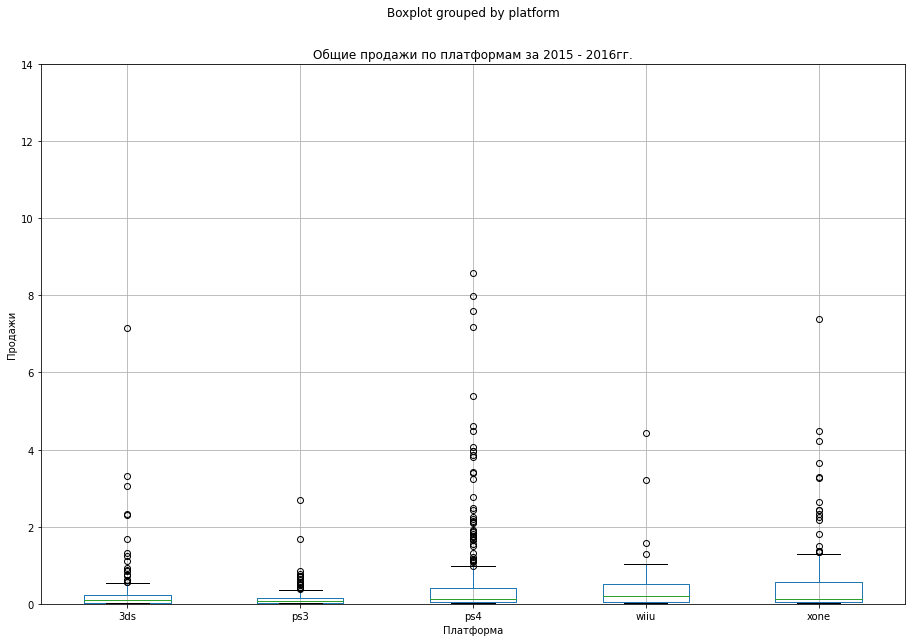

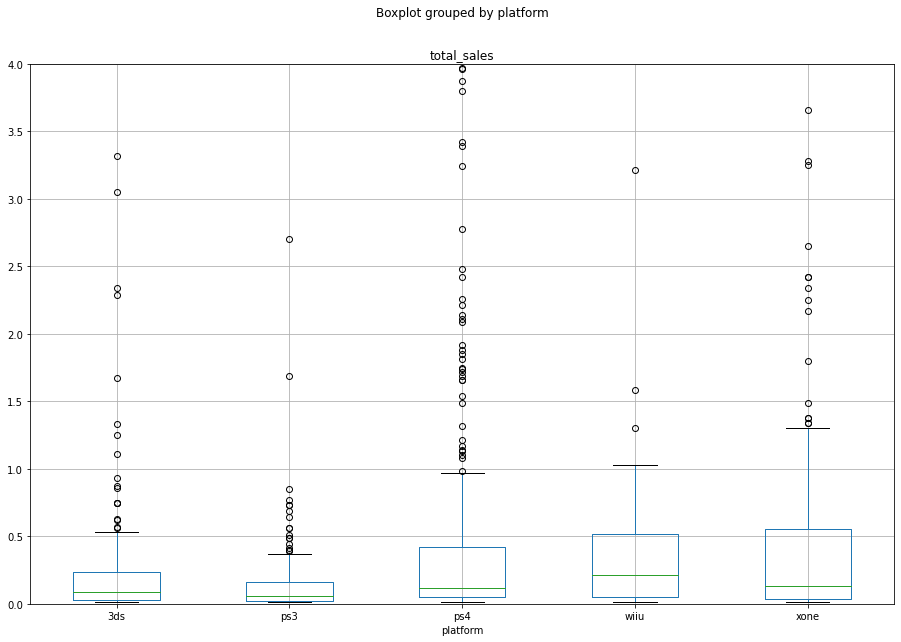

In [28]:
top_5_platfotm.boxplot(by='platform', column='total_sales', figsize=(15,10))
plt.ylim(0, 14)
plt.title("Общие продажи по платформам за 2015 - 2016гг.")
plt.xlabel("Платформа")
plt.ylabel("Продажи");

top_5_platfotm.boxplot(by='platform', column='total_sales', figsize=(15,10))
plt.ylim(0, 4);

In [29]:
print(df[df['platform'] == 'ps4']['total_sales'].describe())
print(df[df['platform'] == 'xone']['total_sales'].describe())

count    301.000000
mean       0.625083
std        1.457063
min        0.010000
25%        0.050000
50%        0.120000
75%        0.420000
max       14.630000
Name: total_sales, dtype: float64
count    167.000000
mean       0.516707
std        0.965940
min        0.010000
25%        0.035000
50%        0.130000
75%        0.555000
max        7.390000
Name: total_sales, dtype: float64


In [30]:
df[df['platform'] == 'ps4'].sort_values(by='total_sales',ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,fifa 17,ps4,2016.0,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,fallout 4,ps4,2015.0,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
171,uncharted 4: a thief's end,ps4,2016.0,shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
230,uncharted: the nathan drake collection,ps4,2015.0,action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
244,call of duty: infinite warfare,ps4,2016.0,shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
288,battlefield 1,ps4,2016.0,shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
302,the witcher 3: wild hunt,ps4,2015.0,role-playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97


Сравнивая топ платформы(PS4 и XOne) видим, что с первый по второй квартиль платформы показывают одинаковые результаты. 

Аномальными значениями явлются AAA проекты/ игры по известным франшизам, которые не можем считать вбросами.

<a name="отзы"></a>
**Посмотрим влияние отзывов пользователей и критиков.**

Коэфициэнт корреляции Пирсона между продажами и пользовательскими отзывами: -0.06
Коэфициэнт коррелиции Пирсона между продажами и отзывми критиков: 0.39
Коэфициэнт корреляции Пирсона между пользовательскими отзывами и отзывми критиков: 0.53


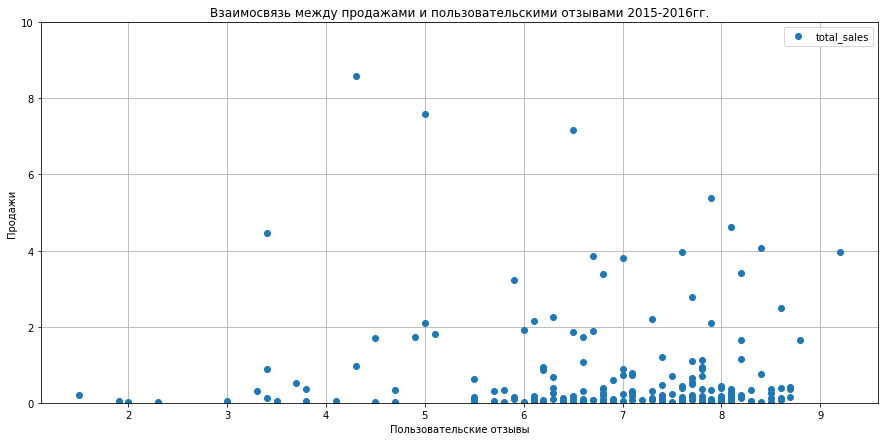

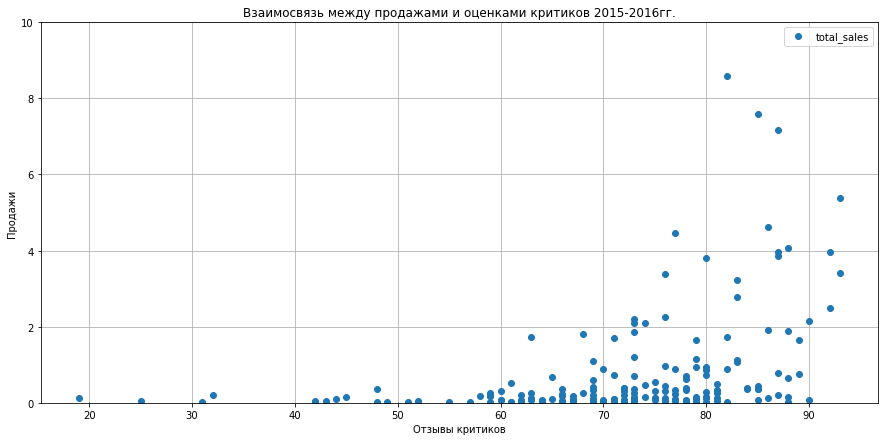

In [31]:
df[df['platform'] == 'ps4'].plot(y='total_sales', x='user_score', style='o', grid=True, figsize=(15,7), ylim= (0,10))
plt.title("Взаимосвязь между продажами и пользовательскими отзывами 2015-2016гг.")
plt.xlabel("Пользовательские отзывы")
plt.ylabel("Продажи");

df[df['platform'] == 'ps4'].plot(y='total_sales', x='critic_score', style='o', grid=True, figsize=(15,7), ylim= (0,10));
plt.title("Взаимосвязь между продажами и оценками критиков 2015-2016гг.")
plt.xlabel("Отзывы критиков")
plt.ylabel("Продажи");

print('Коэфициэнт корреляции Пирсона между продажами и пользовательскими отзывами:' , df.query(
    'platform == "ps4"')['total_sales'].corr(df.query('platform == "ps4"')['user_score']).round(3))
print('Коэфициэнт коррелиции Пирсона между продажами и отзывми критиков:' , df.query(
    'platform == "ps4"')['total_sales'].corr(df.query('platform == "ps4"')['critic_score']).round(2))
print('Коэфициэнт корреляции Пирсона между пользовательскими отзывами и отзывми критиков:' , df.query(
    'platform == "ps4"')['user_score'].corr(df.query('platform == "ps4"')['critic_score']).round(2))

- Связи между оценкой пользователя и кол-вом продаж практически нет;
- Между кол-вом продаж и оценкой критиков умеренно положительная сила коррелиционной связи.

соотнесем выводы с продажами игр на других платформах

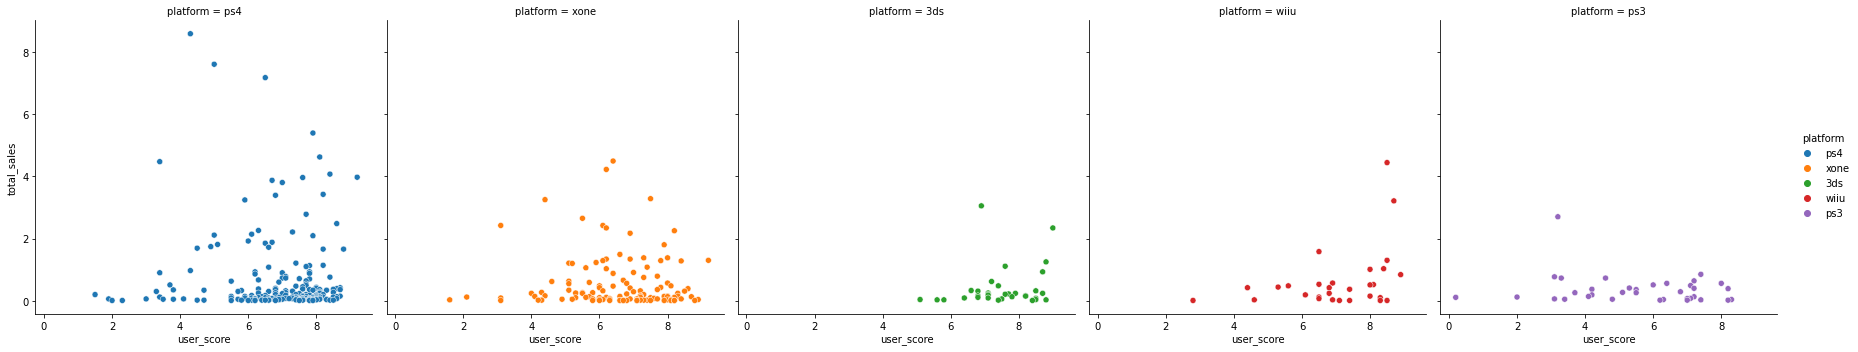

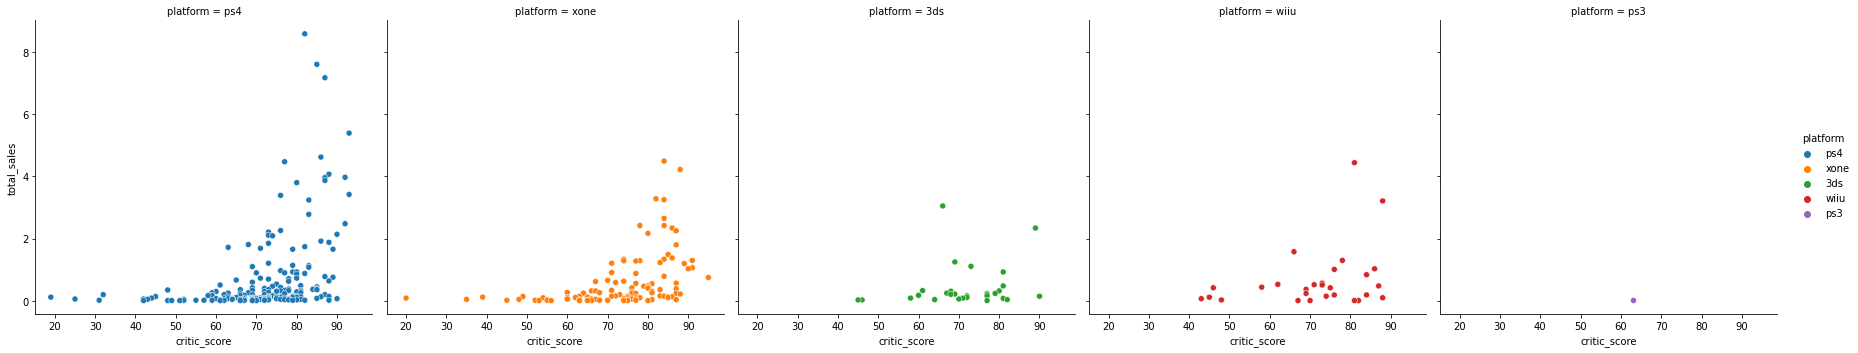

In [32]:
sns.relplot(data=top_5_platfotm, x="user_score", y="total_sales", hue="platform", col="platform", kind="scatter")


sns.relplot(data=top_5_platfotm, x="critic_score", y="total_sales", hue="platform", col="platform", kind="scatter");



In [33]:
q = top_5_platfotm['platform'].unique()
print('Коэфициэнт корреляции Пирсона между продажами и отзывми критиков')
for index in q:
    print(f'Платформа: {index}, Уровень кореляции:', df.query(
        'platform == @index')['total_sales'].corr(df.query('platform == @index')['critic_score']).round(2))

Коэфициэнт корреляции Пирсона между продажами и отзывми критиков
Платформа: ps4, Уровень кореляции: 0.39
Платформа: xone, Уровень кореляции: 0.43
Платформа: 3ds, Уровень кореляции: 0.18
Платформа: wiiu, Уровень кореляции: 0.32
Платформа: ps3, Уровень кореляции: nan


C:\Users\delik\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\delik\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [34]:
print('Коэфициэнт корреляции Пирсона между продажами и пользовательскими отзывами')
for index in q:
    print(f'Платформа: {index}, Уровень кореляции:', df.query(
        'platform == @index')['total_sales'].corr(df.query('platform == @index')['user_score']).round(2))

Коэфициэнт корреляции Пирсона между продажами и пользовательскими отзывами
Платформа: ps4, Уровень кореляции: -0.06
Платформа: xone, Уровень кореляции: -0.04
Платформа: 3ds, Уровень кореляции: 0.2
Платформа: wiiu, Уровень кореляции: 0.36
Платформа: ps3, Уровень кореляции: -0.17


In [35]:
print('Коэфициэнт корреляции Пирсона между отзывми критиков и пользовательскими отзывами')
for index in q:
    print(f'Платформа: {index}, Уровень кореляции:', df.query(
        'platform == @index')['critic_score'].corr(df.query('platform == @index')['user_score']).round(2))

Коэфициэнт корреляции Пирсона между отзывми критиков и пользовательскими отзывами
Платформа: ps4, Уровень кореляции: 0.53
Платформа: xone, Уровень кореляции: 0.46
Платформа: 3ds, Уровень кореляции: 0.79
Платформа: wiiu, Уровень кореляции: 0.68
Платформа: ps3, Уровень кореляции: nan


**Вывод:**
В целом, данные по всем платформам схожи.


<a name="общее"></a>
**Посмотрим на общее распределение игр по жанрам.**

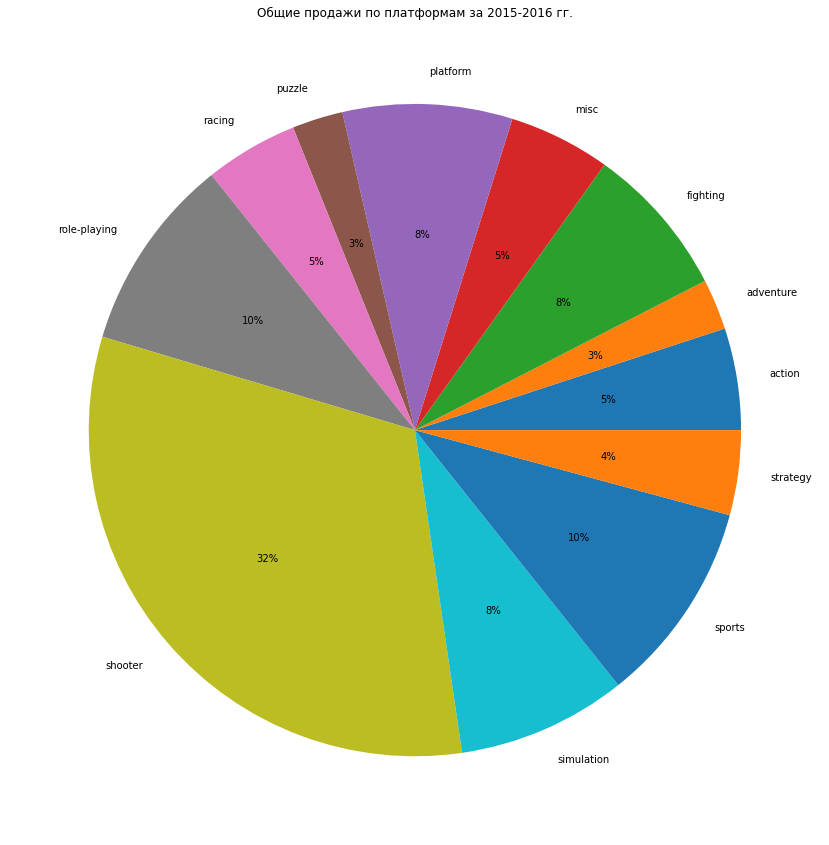

In [36]:
top_platform = df.pivot_table(
    columns='genre', values ='total_sales', aggfunc='median').dropna().T.plot(
    kind='pie', y = 'total_sales', legend = False, autopct= '%1.0f%%', figsize=(15, 15))

plt.title("Общие продажи по платформам за 2015-2016 гг.")
plt.ylabel("");

In [37]:
df.pivot_table(columns='genre', values ='total_sales', aggfunc='median').T.sort_values(by='total_sales', ascending= False)

,total_sales
genre,
shooter,0.380
sports,0.120
role-playing,0.115
platform,0.100
simulation,0.100
fighting,0.090
action,0.060
misc,0.060
racing,0.055


**Вывод:**
Наиболее выгодными жанрами: shooter, sports, role-playing, platform, simulation

<a name="портрет"></a>
## 4. Составим портрет пользователя

<a name="лидер"></a>
**Посмотрим лидеров продаж по регионам**

C:\Users\delik\AppData\Local\Temp\ipykernel_15128\1206800743.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eu_sales = eu_sales.append({'platform' : 'other', 'eu_sales' : eu_sales.loc[5:,'eu_sales']\


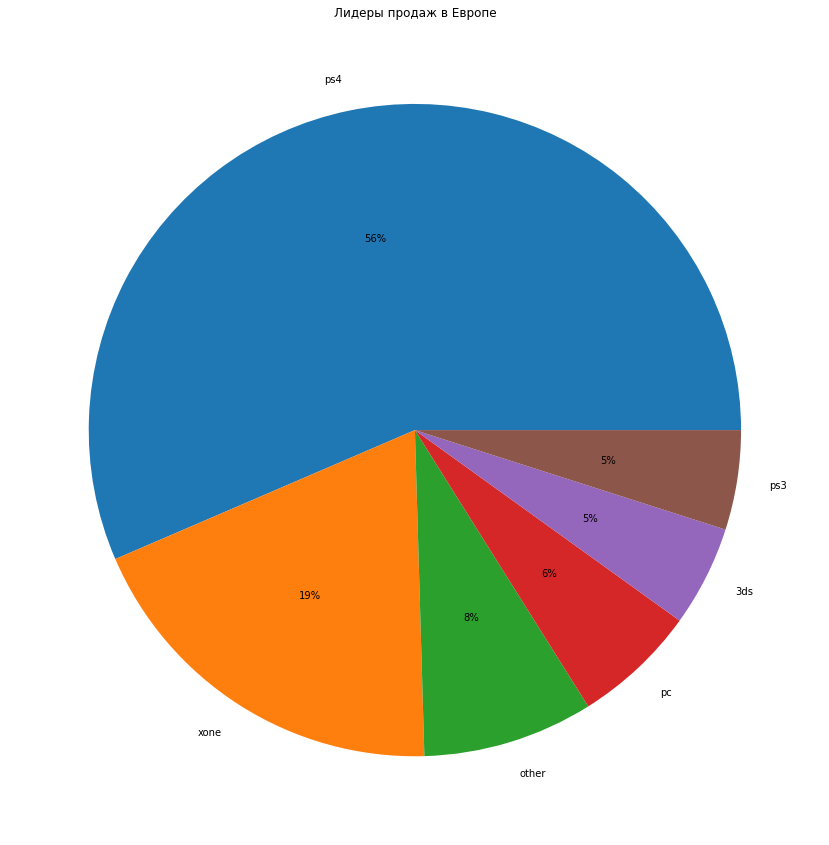

In [38]:
eu_sales = df.groupby('platform').agg(eu_sales = ('eu_sales', 'sum'))\
    .sort_values(by='eu_sales',ascending = False).reset_index()
eu_sales = eu_sales.append({'platform' : 'other', 'eu_sales' : eu_sales.loc[5:,'eu_sales']\
                            .sum()}, ignore_index=True).set_index('platform').sort_values(by='eu_sales',ascending=False)[:6]


eu_sales.plot(kind='pie', y = 'eu_sales', legend = False, autopct= '%1.0f%%', figsize=(15, 15));

plt.title("Лидеры продаж в Европе")
plt.ylabel("");

C:\Users\delik\AppData\Local\Temp\ipykernel_15128\442750649.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_sales = na_sales.append({'platform' : 'other', 'na_sales' : na_sales.loc[5:,'na_sales']\


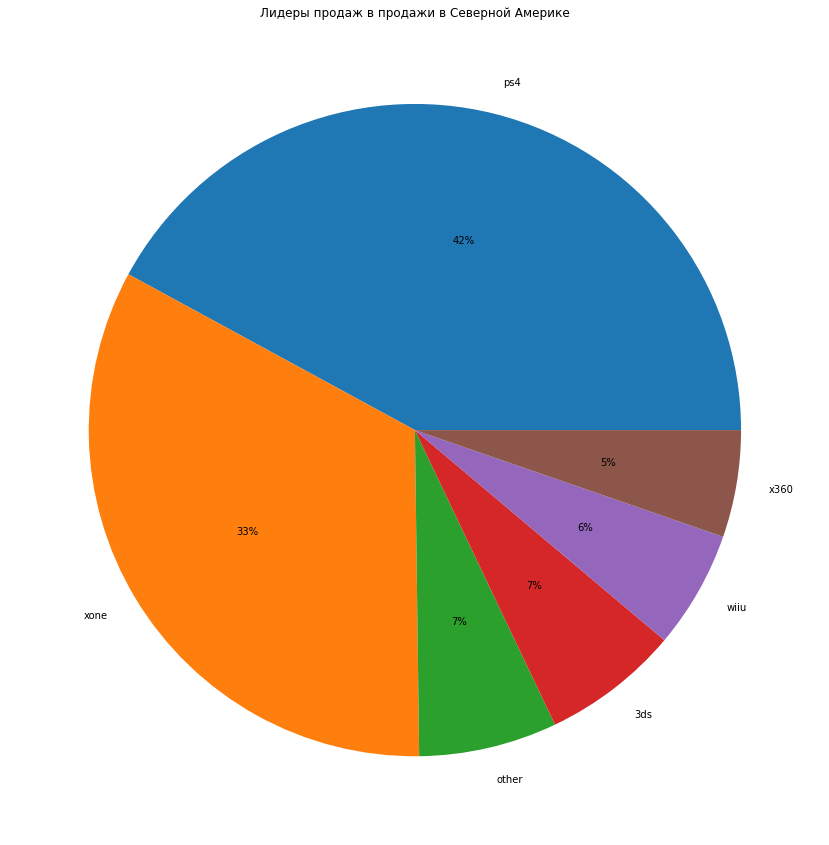

In [39]:
na_sales = df.groupby('platform').agg(na_sales = ('na_sales', 'sum'))\
    .sort_values(by='na_sales',ascending = False).reset_index()
na_sales = na_sales.append({'platform' : 'other', 'na_sales' : na_sales.loc[5:,'na_sales']\
                            .sum()}, ignore_index=True).set_index('platform').sort_values(by='na_sales',ascending=False)[:6]


na_sales.plot(
    kind='pie', y = 'na_sales', legend = False, autopct= '%1.0f%%', figsize=(15, 15));

plt.title("Лидеры продаж в продажи в Северной Америке")
plt.ylabel("");

C:\Users\delik\AppData\Local\Temp\ipykernel_15128\4077726836.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jp_sales = jp_sales.append({'platform' : 'other', 'jp_sales' : jp_sales.loc[5:,'jp_sales']\


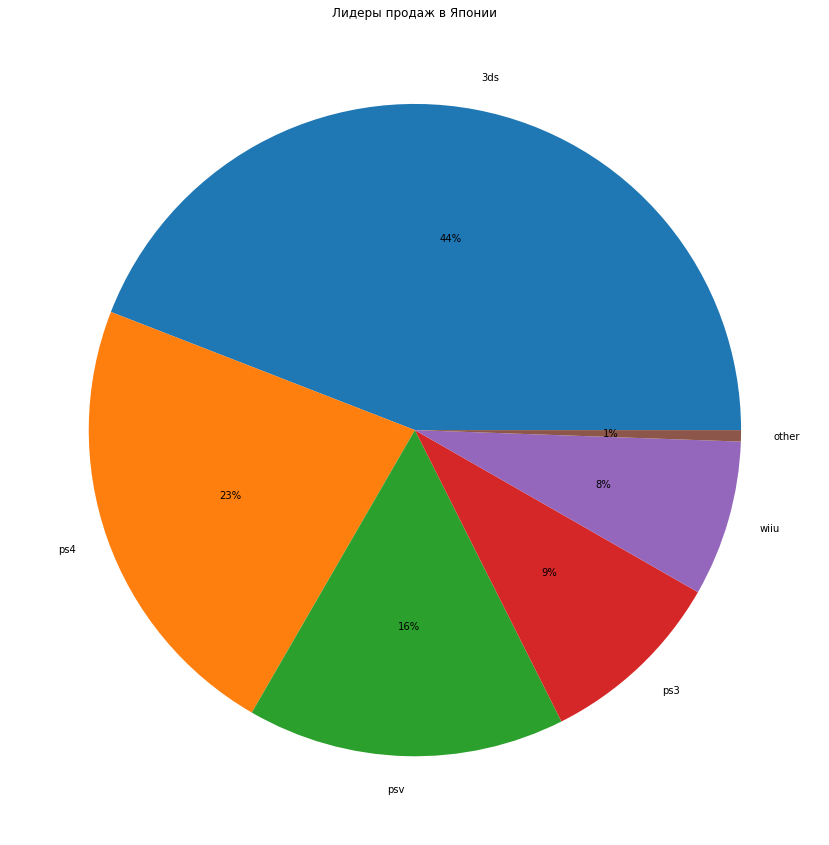

In [40]:
jp_sales = df.groupby('platform').agg(jp_sales = ('jp_sales', 'sum'))\
    .sort_values(by='jp_sales',ascending = False).reset_index()
jp_sales = jp_sales.append({'platform' : 'other', 'jp_sales' : jp_sales.loc[5:,'jp_sales']\
                            .sum()}, ignore_index=True).set_index('platform').sort_values(by='jp_sales',ascending=False)[:6]


jp_sales.plot(
    kind='pie', y = 'jp_sales', legend = False, autopct= '%1.0f%%', figsize=(15, 15));

plt.title("Лидеры продаж в Японии")
plt.ylabel("");

**Вывод:**
В Америке и Европе лидером является PS4, в Японии 3DS. 

<a name="жанры1"></a>
**Найдем наиоблее популярные жанры.**

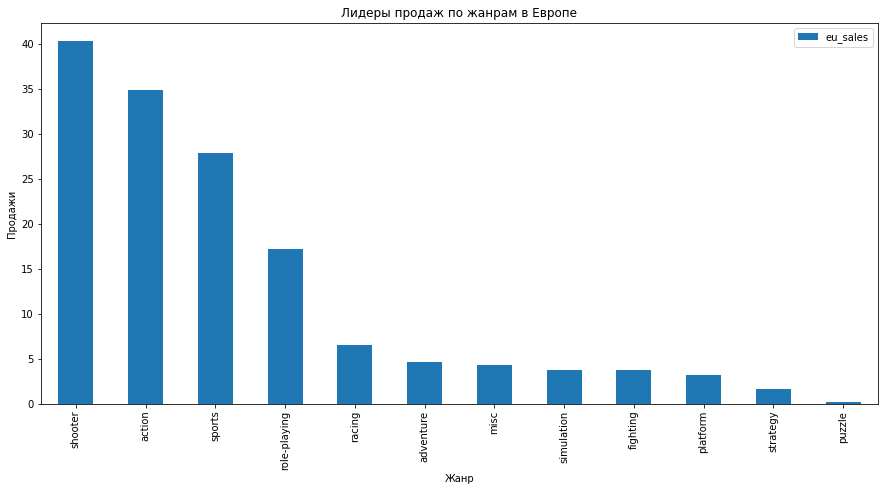

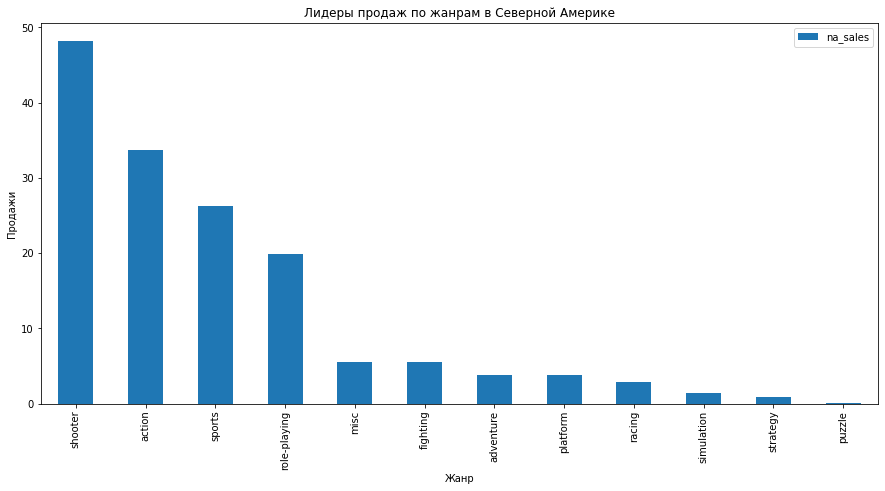

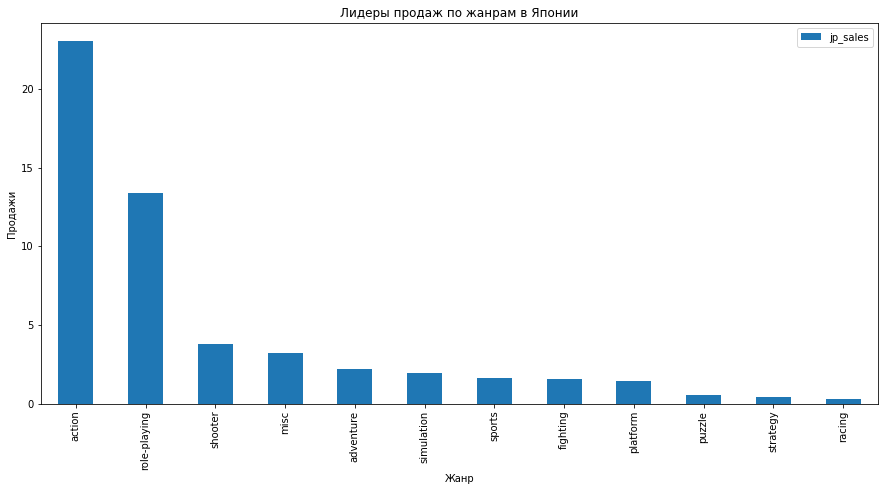

In [41]:
eu_sales1 = df.groupby('genre').agg(eu_sales = ('eu_sales', 'sum')).sort_values(by='eu_sales', ascending = False).plot(
        kind='bar', figsize=(15,7))

plt.title('Лидеры продаж по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel("Продажи");

na_sales1 = df.groupby('genre').agg(na_sales = ('na_sales', 'sum')).sort_values(by='na_sales', ascending = False).plot(
        kind='bar', figsize=(15,7))

plt.title('Лидеры продаж по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel("Продажи");

jp_sales1 = df.groupby('genre').agg(jp_sales = ('jp_sales', 'sum')).sort_values(by='jp_sales', ascending = False).plot(
        kind='bar', figsize=(15,7))

plt.title('Лидеры продаж по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel("Продажи");

**Вывод:**

В Европе и Америке у игроков одинаковые вкусы, за исключением последних позиций в ТОП 5. Наибольшей пополярностью пользуются игры в жанре 'shooter'.
- Европа:           shooter, action, sports, role-playing, racing
- Северная Америка: shooter, action, sports, role-playing, misc

В Японии игроки отдают бОльшее предпочтение играм в жанре 'action'.

- Япония:           action, role-playing, shooter, misc, adventure

<a name="ESRB"></a>
**Посмотрим влияние рейтинга ESRB на продажи**

In [42]:
df.loc[:, 'rating'] = df['rating'].fillna('unknown')


In [43]:
print(df.groupby(['rating']).agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False))
print(df.groupby(['rating']).agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False))
print(df.groupby(['rating']).agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False))

         eu_sales
rating           
M           45.54
unknown     35.71
E           34.83
T           20.32
E10+        11.54
         na_sales
rating           
M           47.03
unknown     37.44
E           26.59
T           22.86
E10+        17.87
         jp_sales
rating           
unknown     32.89
T            7.70
E            5.25
M            4.29
E10+         3.27


***Вывод:***
В Европе и Америке по продажам лидируют игры с рейтингом «Для взрослых», когда в Японии большей пополярностью пользуются игры с рейтингом «Подросткам».

Необходимо отметить, что не малую долю занимают игры без рейтинга, особенно это выделяется в Японии.

<a name="гипотеза"></a>
## 5. Проверка гипотез

<a name="PC"></a>
гипотеза:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 

H_0: средний пользовательский рейтинг(user_score) платформы Xbox = среднему пользовательскому рейтингу(user_score) платформы PC

H_1: средний пользовательский рейтинг(user_score) платформы Xbox ≠ среднему пользовательскому рейтингу(user_score) платформы PC


In [44]:
results = st.ttest_ind(df[df['platform']== 'xone']['user_score'].dropna(), 
                       df[df['platform']== 'pc']['user_score'].dropna())

alpha = .05

print(results.pvalue)


if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


<a name="Sports"></a>
гипотеза: cредние пользовательские рейтинги жанров Action и Sports разные.

Для проверки возьмём Гипотезу о равенстве средних двух генеральных совокупностей Ttest_ind() 

H_0: средний пользовательский рейтинг(user_score) жанра Action = среднему пользовательскому рейтингу(user_score) платформы Sports

H_1: средний пользовательский рейтинг(user_score) жанра Action ≠ среднему пользовательскому рейтингу(user_score) платформы Sports

In [45]:
results = st.ttest_ind(df[df['genre']== 'action']['user_score'].dropna(), 
                       df[df['genre']== 'sports']['user_score'].dropna())

alpha = 0.05

print(results.pvalue)


if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.0012846807938657e-13
Отвергаем нулевую гипотезу


<a name="общаг"></a>
## 6. Общий вывод

Начиная с 1990 г. кол-во выпускаемых игр уверенно растет от года к году. Разворотной точкой стал 2008 г. К наиболее вероятные причинам начала резкого спада можем отнести:
- Кризис 2008 года;
- Выход App Store 2008 год, Android Market 20008 год и хранилища для Windows Phone 2010 год;
- Появление free to play игр для мобильных платформ со встроенными микротранзакциями.

***Выбор платформы***

За перриод, взятый в исследовании, было выпущено более 30-ти платформ. Средняя продолжительность жизни платформы составляет 10 лет. На текущий момент, только 9 активных, а 3 платформы, в сумме, занимают 80% всего рынка.

Исходя из общих полученных данных можно выделить 2 наиболее песпективные платформы на 2017 г.:
- PS4 - доля рынка 47%, с даты выхода консоли прошло 4 года;
- XOne - доля рынка 22%, с даты выхода консоли прошло 4 года.

***Жанры***

- Наиболее пополярными жанрами, в общей картине, являются: shooter, action, sports, role-playing. В сумме эти жаны занимаю 83% рынка;
- Наиболее выгодными жанрами: shooter, sports, role-playing, platform, simulation;
- Наименее выгоднями жанрами: misc, racing, strategy,  adventure, puzzle.



***Влияние отзывов на кол-во продаж***

- При закупке игр не следует обращать внимание на пользовательские оценки игры, т.к. по результату исследования мы видим, что связи межу кол-вом продаж и высоким пользоваельским рейтингом практически нет. Также, можно отметить, что по некотрым платформам она имеет слабую отрицательную тенденцию.
- В свою очередь, у критиков чаще удается предсказать, будет ли игра успешна или нет, мы наблюдаем умеренно положительную связь между продажами и положительными отзывами критиков. 

***Влияние региона на предпочтения покупателя***

В зависимости от региона, предпочтения покупателя могут измениться в выборе приставки, жанра, рейтинга игры, этот момент также необходимо учитывать при составлении плана по закупкам.

***Европа:***
- Предпочитают играть на PS4 (56% продаж) и XOne (19% продаж) 
- Самые популярные жанры: shooter, action, sports, role-playing, racing 
- Рейтинг игры М, E

***Северная Америка:***
- Предпочитают играть на PS4 (42% продаж) и XOne (33% продаж) 
- Самые популярные жанры: shooter, action, sports, role-playing, misc 
- Рейтинг игры М, E

***Япония:***
- Предпочитают играть на 3DS (44% продаж) и PS4 (23% продаж) 
- Самые популярные жанры: action, role-playing, shooter, misc, adventure 
- Рейтинг игры T, E. Также, необходимо понимать, что подавляющее число игр без присвоенного рейтинга.